# Muhammad Bilal - PIAIC126346 - Ionosphere Data Problem

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('ionosphere_data.csv')

In [3]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
data.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [6]:
print(data.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64


In [7]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [8]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True)             #Data did not need to be shuffled but I saw there was a pattern in 
                                                      #labels repitition so I shuffled the data.

In [9]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,1.00000,0.16195,1.00000,-0.05558,1.00000,0.01373,1.00000,-0.12352,...,-0.22978,1.00000,-0.06823,1.00000,0.08299,1.00000,-0.14194,1.00000,-0.07439,g
1,1,0,0.74916,0.02549,0.98994,0.09792,0.75855,0.12877,0.74313,-0.09188,...,-0.01207,0.82271,0.02552,0.72435,-0.01073,0.90409,0.11066,0.72837,0.02750,g
2,0,0,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,...,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,b
3,1,0,1.00000,-0.03730,1.00000,-0.07383,0.99601,-0.11039,0.99838,-0.09931,...,-0.42990,0.83172,-0.43122,0.81433,-0.42593,0.77919,-0.47977,0.75115,-0.50152,g
4,1,0,0.87111,0.04326,0.79946,0.18297,0.99009,0.29292,0.89455,-0.08337,...,-0.09193,0.85967,-0.02908,0.78774,-0.04101,0.75935,0.21812,0.88238,0.09193,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.99645,0.06468,1.00000,-0.01236,0.97811,0.02498,0.96112,0.02312,...,0.13412,0.79476,0.13638,0.79110,0.15379,0.77122,0.15930,0.70941,0.12015,g
347,0,0,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,b
348,1,0,0.65845,0.43617,0.44681,0.74804,0.05319,0.85106,-0.32027,0.82139,...,-0.18645,0.74758,0.23713,0.45185,0.59071,0.20549,0.76764,-0.18533,0.74356,g
349,1,0,0.05866,-0.00838,0.06704,0.00838,0.00000,-0.01117,0.00559,-0.03911,...,0.00559,0.10335,-0.00838,0.03073,-0.00279,0.04469,0.00000,0.04749,-0.03352,b


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['label'] = lb.fit_transform(data['label'])

In [11]:
x = data.drop(labels = 'label', axis = 1)
y = data[['label']]                                #Encoding labels : 1 for Good and 0 for Bad

In [12]:
y

,label
0,1
1,1
2,0
3,1
4,1
...,...
346,1
347,0
348,1
349,0


In [13]:
data.dtypes

feature1       int64
feature2       int64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label          int32
dtype: object

In [14]:
train_data , test_data , train_labels , test_labels = train_test_split(x, y, train_size = 0.6 , test_size = 0.4 , random_state = 42)

In [15]:
sc = StandardScaler()
train_data = sc.fit_transform(train_data)         #Standarized the input data
test_data = sc.transform(test_data)

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (train_data.shape[1], )))
model.add(layers.Dense(8, activation='relu'))          #Added one more hidden layer and my test accuracy got better > 92%
model.add(layers.Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])  

In [31]:
Result = model.fit(train_data, train_labels, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.3810
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7138 - accuracy: 0.4476
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6381
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6178 - accuracy: 0.7238
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.7619
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8000
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.8238
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.8381
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.8524
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8714
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9952
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9952
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9952
Epoch 87/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9952
Epoch 88/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9952
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9952
Epoch 90/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9952
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9952
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9952
Epoch 93/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9952
Epoch 94/100
7/7 [===============

In [32]:
history_dict = Result.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


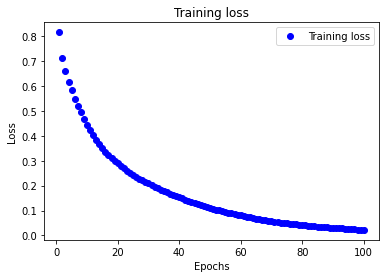

In [33]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
Evaluation = model.evaluate(test_data, test_labels)
print(Evaluation)   

5/5 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.9220
[0.36075955629348755, 0.9219858050346375]


In [35]:
Prediction = model.predict(test_data)

In [36]:
print(Prediction)
print(Prediction.shape)

[[9.9837160e-01]
 [1.0587213e-08]
 [9.9357718e-01]
 [9.9939907e-01]
 [9.3787408e-01]
 [9.9973905e-01]
 [9.9983221e-01]
 [9.9979717e-01]
 [3.1910449e-01]
 [9.9979770e-01]
 [1.1220658e-01]
 [8.0882442e-01]
 [3.1447613e-01]
 [9.9569309e-01]
 [9.9835122e-01]
 [9.9934196e-01]
 [9.9971211e-01]
 [5.3837001e-03]
 [1.3415161e-01]
 [9.9212086e-01]
 [9.9985957e-01]
 [2.6995496e-13]
 [9.8457146e-01]
 [9.9291241e-01]
 [4.5372875e-07]
 [9.9516803e-01]
 [9.9703002e-01]
 [9.8068249e-01]
 [9.9951142e-01]
 [9.6544191e-08]
 [9.8971152e-01]
 [9.9717778e-01]
 [9.9987113e-01]
 [9.8519784e-01]
 [6.3366571e-08]
 [9.7381294e-01]
 [9.9959600e-01]
 [9.8833239e-01]
 [9.9722469e-01]
 [9.5852029e-01]
 [3.9223075e-02]
 [9.8457134e-01]
 [9.9911332e-01]
 [1.8841028e-04]
 [9.9718738e-01]
 [9.9872154e-01]
 [9.9990559e-01]
 [9.9986279e-01]
 [7.8234076e-04]
 [2.4981049e-05]
 [9.9555838e-01]
 [9.8206961e-01]
 [2.3503512e-02]
 [9.9981022e-01]
 [9.9985886e-01]
 [9.9544680e-01]
 [9.8827088e-01]
 [9.8509234e-01]
 [9.9409437e-0

In [37]:
a = np.where(Prediction < 0.5 , 0 , 1)
print("Predicted Shape : ",a.shape, " Original Shape : ", test_labels.shape)
print("----------------------------------------------------------------")
print("Predicted Labels\n", a)
print("----------------------------------------------------------------")
print("Original Labels\n", test_labels)

Predicted Shape :  (141, 1)  Original Shape :  (141, 1)
----------------------------------------------------------------
Predicted Labels
 [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
----------------------------------------------------------------
Original Labels
      label
157      1
342      0
316      1
234      1
155      0
..     

In [38]:
b = np.where(a == 1, 'Good', 'Bad')
print(b)
c = np.where (a == test_labels , 'Match' , 'Not Match')
print("-------------------------------------")
print(c)
print("Prediction match with original labels for :                   ",  len(c[c == 'Match']))
print("Prediction does not match with original labels for :          ", len(c[c == 'Not Match']))

[['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Bad']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Bad']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad']
 ['Good']
 ['Bad']
 ['Good']
 ['Good']
 ['Bad

In [41]:
Prediction_Percentage = (len(c[c == 'Match'])/test_labels.shape[0])*100
print("Prediction Percentage : ", Prediction_Percentage)

Prediction Percentage :  92.19858156028369
